In [1]:
import pandas as pd
from numpy import random
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import sys
import matplotlib
import math
from sklearn import tree
from  sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
df = pd.read_csv('./songs.csv')
df

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3
...,...,...,...,...,...,...,...,...,...,...
355,just-like-that,2006,abba,Pop,Until that day\nMy life had been a river\nFoll...,972,2,0,0,1
356,ring-ring,1995,abba,Pop,I was sitting by the phone\nI was waiting all ...,1283,33,0,0,3
357,reina-danzante,1981,abba,Pop,You can dance\nYou can jive\nHaving the time o...,810,1,0,0,0
358,code-of-the-streets,2006,gangstarr,Hip-Hop,Take this for example young brothers want rep\...,1996,34,0,0,5


In [3]:
x = df[['year', 'length', 'commas', 'exclamations','colons','hyphens']]
y = df['artist']


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [5]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [6]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [7]:
depth = 1
f1=0
while f1 < 0.82:
    clf = DecisionTreeClassifier(class_weight='balanced', min_samples_split=32,max_depth=depth)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    f1 = f1_score(y_test,y_pred,average='micro')
    print(f'{f1} ----  {depth}')
    depth+=1


0.5666666666666667 ----  1
0.6555555555555556 ----  2
0.6555555555555556 ----  3
0.6777777777777778 ----  4
0.6777777777777778 ----  5
0.8222222222222222 ----  6


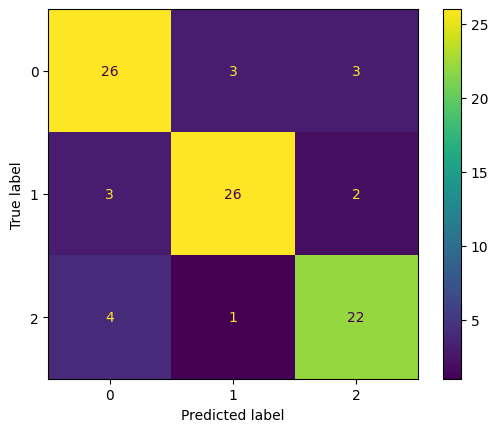

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

<Axes: >

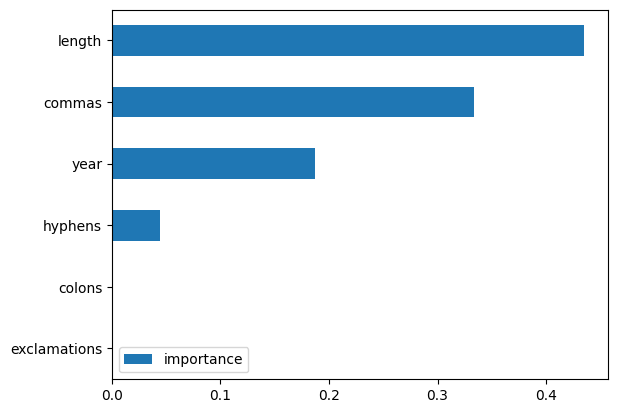

In [9]:
importances_df = pd.DataFrame(clf.feature_importances_,index=x.columns,columns=['importance'])
importances_df.sort_values(by='importance').plot(kind='barh')

----------------- other_dataset -----------------------------